
# Heart Disease Prediction Analysis
This notebook aims to analyze a dataset related to heart disease and predict the likelihood of heart disease based on various attributes.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



## Data Loading
Loading the heart disease dataset into a Pandas DataFrame.


In [3]:

data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



## Data Overview
Examining the basic structure of the dataset.


In [4]:

# Displaying the shape of the dataset
print("Dataset Shape:", data.shape)

# Detailed information about the dataset
data.info()


Dataset Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB



## Checking for Missing Values
It's important to check for missing values in the dataset as they can affect the results of our analysis.


In [5]:

data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Target Variable Analysis
Analyzing the distribution of the target variable (presence or absence of heart disease).


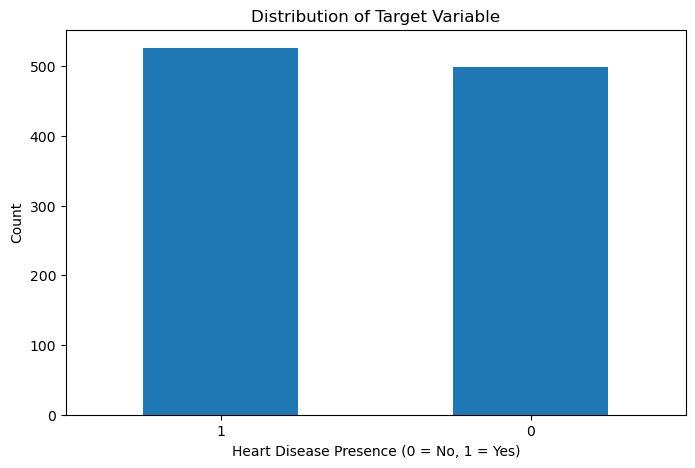

In [6]:

# Count of each class in the target variable
target_counts = data['target'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease Presence (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



## Splitting the Dataset into Features and Target
The dataset is divided into 'features' (independent variables) and 'target' (dependent variable).


In [7]:
#Splitting the Features and Target
X = data.drop(columns='target',axis=1)
Y= data['target']
print(X)
print(Y)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  


## Train-Test Split
Dividing the data into training and testing sets to evaluate the performance of our model on unseen data.


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
#20% data niyesi test korar jonno r baki 80% data niyesi  model take train korar jonno




## Model Training and Evaluation
Training a Logistic Regression model and evaluating its performance on the test data.


In [9]:

# Training the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predicting on Test Data
Y_pred = model.predict(X_test)

# Calculating the Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of Logistic Regression:", accuracy)


Accuracy of Logistic Regression: 0.8048780487804879


C:\Users\risha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
import pickle

In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\risha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pickle.dump(model, open('model.pkl','wb'))


In [21]:
test = pd.read_csv('heart.csv')

In [22]:
test.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
586,64,1,2,125,309,0,1,131,1,1.8,1,0,3
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2
462,52,1,3,118,186,0,0,190,0,0.0,1,0,1
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,63,1,0,130,254,0,0,147,0,1.4,1,1,3
906,42,1,0,140,226,0,1,178,0,0.0,2,0,2
1002,66,1,0,112,212,0,0,132,1,0.1,2,1,2
966,58,1,0,128,259,0,0,130,1,3.0,1,2,3


In [25]:
Y_train

14      0
586     0
16      1
462     1
186     0
       ..
221     0
906     1
1002    0
966     0
191     1
Name: target, Length: 820, dtype: int64